## Data

In [1]:
pwd

'/home/share/huadjyin/home/zhoumin3/LucaOne/LucaOneApp-master/algorithms'

In [2]:
import pandas as pd
data = pd.read_csv('/home/share/huadjyin/home/zhoumin3/LucaOne/LucaOneApp-master/data/prot.csv')

In [3]:
data.head()

,species,gene_id,protein_id,seq
0,acanthochromis_polyacanthus,ENSAPOG00000014143,ENSAPOP00000028730,MAKKRRETRETDGFLSAQEEVKANAYVSQELKEAQQSVGGSTRMSL...
1,ailuropoda_melanoleuca,ENSAMEG00000003996,ENSAMEP00000033062,MAKGRVSERSQTGALHTTPGGDRAAGTRGLTAQGSGDHLKEKACAE...
2,amphilophus_citrinellus,ENSACIG00000000678,ENSACIP00000000790,LTLSQKMAKKRRETRDADGLSSAQEEVKANSKVLKAAQHSVGGSAR...
3,amphiprion_ocellaris,ENSAOCG00000009204,ENSAOCP00000023248,MAKKRRETRETDGLLSAQEEVKTNANVSQELKEAQQSVGGSTRMSL...
4,amphiprion_percula,ENSAPEG00000009804,ENSAPEP00000013744,MAKKRRETRETDGLLSAQEEVKTNANVSQELKEAQQSVGGSTRMSL...


In [4]:
label = pd.read_csv('/home/share/huadjyin/home/zhoumin3/LucaOne/LucaOneApp-master/data/label_final.csv')

In [5]:
label.head()

,species,protein_id,p5len_x,p5len_summary,phylum_sub,class_sub,order_sub,group_class_sub,groupm_sub,group_sub,subgroup_sub,environment_sub,habitat_sub,p5len_s1,p5len_s2,p5len_new,p5len_group,p5len_group_new
0,acanthochromis_polyacanthus,ENSAPOP00000028730,52.0,Short,Chordata,Actinopteri,NaN,Fish,NaN,Fish,Actinopteri,Temperate,Aquatic,51 - 60,Normal,31.0,Group2,Group2
1,ailuropoda_melanoleuca,ENSAMEP00000033062,60.0,Normal,Chordata,Mammalia,Carnivora,Mammal,nrEutheria,nrEutheria,Carnivora,Cold,Aquatic,51 - 60,Normal,39.0,Group3,Group2
2,amphilophus_citrinellus,ENSACIP00000000790,55.0,Short,Chordata,Actinopteri,Cichliformes,Fish,NaN,Fish,Actinopteri,Temperate,Terrestrial,51 - 60,Normal,34.0,Group2,Group2
3,amphiprion_ocellaris,ENSAOCP00000023248,52.0,Short,Chordata,Actinopteri,NaN,Fish,NaN,Fish,Actinopteri,Temperate,Aquatic,51 - 60,Normal,31.0,Group2,Group2
4,amphiprion_percula,ENSAPEP00000013744,52.0,Short,Chordata,Actinopteri,NaN,Fish,NaN,Fish,Actinopteri,Temperate,Aquatic,51 - 60,Normal,31.0,Group2,Group2


In [6]:
label['p5len_group_new'].value_counts()

p5len_group_new
Group2    153
Group1     39
Group3     17
Name: count, dtype: int64

In [7]:
selected_data = data[data['protein_id'].isin(label['protein_id'])]
if len(selected_data) == len(label):
    print("Correct")
else:
    print("Check")

Correct


In [8]:
selected_data = selected_data.merge(label[['protein_id', 'p5len_group_new', 'group_class_sub']], on='protein_id', how='left')
selected_data.head()

,species,gene_id,protein_id,seq,p5len_group_new,group_class_sub
0,acanthochromis_polyacanthus,ENSAPOG00000014143,ENSAPOP00000028730,MAKKRRETRETDGFLSAQEEVKANAYVSQELKEAQQSVGGSTRMSL...,Group2,Fish
1,ailuropoda_melanoleuca,ENSAMEG00000003996,ENSAMEP00000033062,MAKGRVSERSQTGALHTTPGGDRAAGTRGLTAQGSGDHLKEKACAE...,Group2,Mammal
2,amphilophus_citrinellus,ENSACIG00000000678,ENSACIP00000000790,LTLSQKMAKKRRETRDADGLSSAQEEVKANSKVLKAAQHSVGGSAR...,Group2,Fish
3,amphiprion_ocellaris,ENSAOCG00000009204,ENSAOCP00000023248,MAKKRRETRETDGLLSAQEEVKTNANVSQELKEAQQSVGGSTRMSL...,Group2,Fish
4,amphiprion_percula,ENSAPEG00000009804,ENSAPEP00000013744,MAKKRRETRETDGLLSAQEEVKTNANVSQELKEAQQSVGGSTRMSL...,Group2,Fish


In [9]:
selected_data.columns

Index(['species', 'gene_id', 'protein_id', 'seq', 'p5len_group_new',
       'group_class_sub'],
      dtype='object')

In [19]:
selected_data.shape

(209, 6)

In [10]:
result = selected_data.loc[21,'species']
result

'caenorhabditis_elegans'

## ESM_mean_index

In [20]:
import os, torch
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import os, torch
esm_embedding_dirpath = "/home/share/huadjyin/home/zhoumin3/LucaOne/LucaOneApp-master/Output/esm_mean_matrix"
X_esm = []
label_idx_list = []

In [22]:
for index, row in selected_data.iterrows():
    seq_id = row['protein_id']
    x = torch.load(os.path.join(esm_embedding_dirpath, "matrix_" + seq_id + ".pt"))
    # mean
    x = x[1:-1,:].mean(axis=0)
    X_esm.append(x)
    label_idx_list.append(row['p5len_group_new'])   #p5len_summary, group_class_sub, environment_sub, habitat_sub

X_esm = np.array(X_esm)
print(X_esm.shape)

(209, 2560)


In [23]:
tsne = manifold.TSNE(n_components=2, learning_rate='auto', init='pca', random_state=501)
X_esm_embedded = tsne.fit_transform(X_esm)
print("Org data dimension is {}. Embedded data dimension is {}".format(X_esm.shape[-1], X_esm_embedded.shape[-1]))
print(X_esm_embedded.shape)
print("label:", set(label_idx_list))

Org data dimension is 2560. Embedded data dimension is 2
(209, 2)
label: {'Group1', 'Group3', 'Group2'}


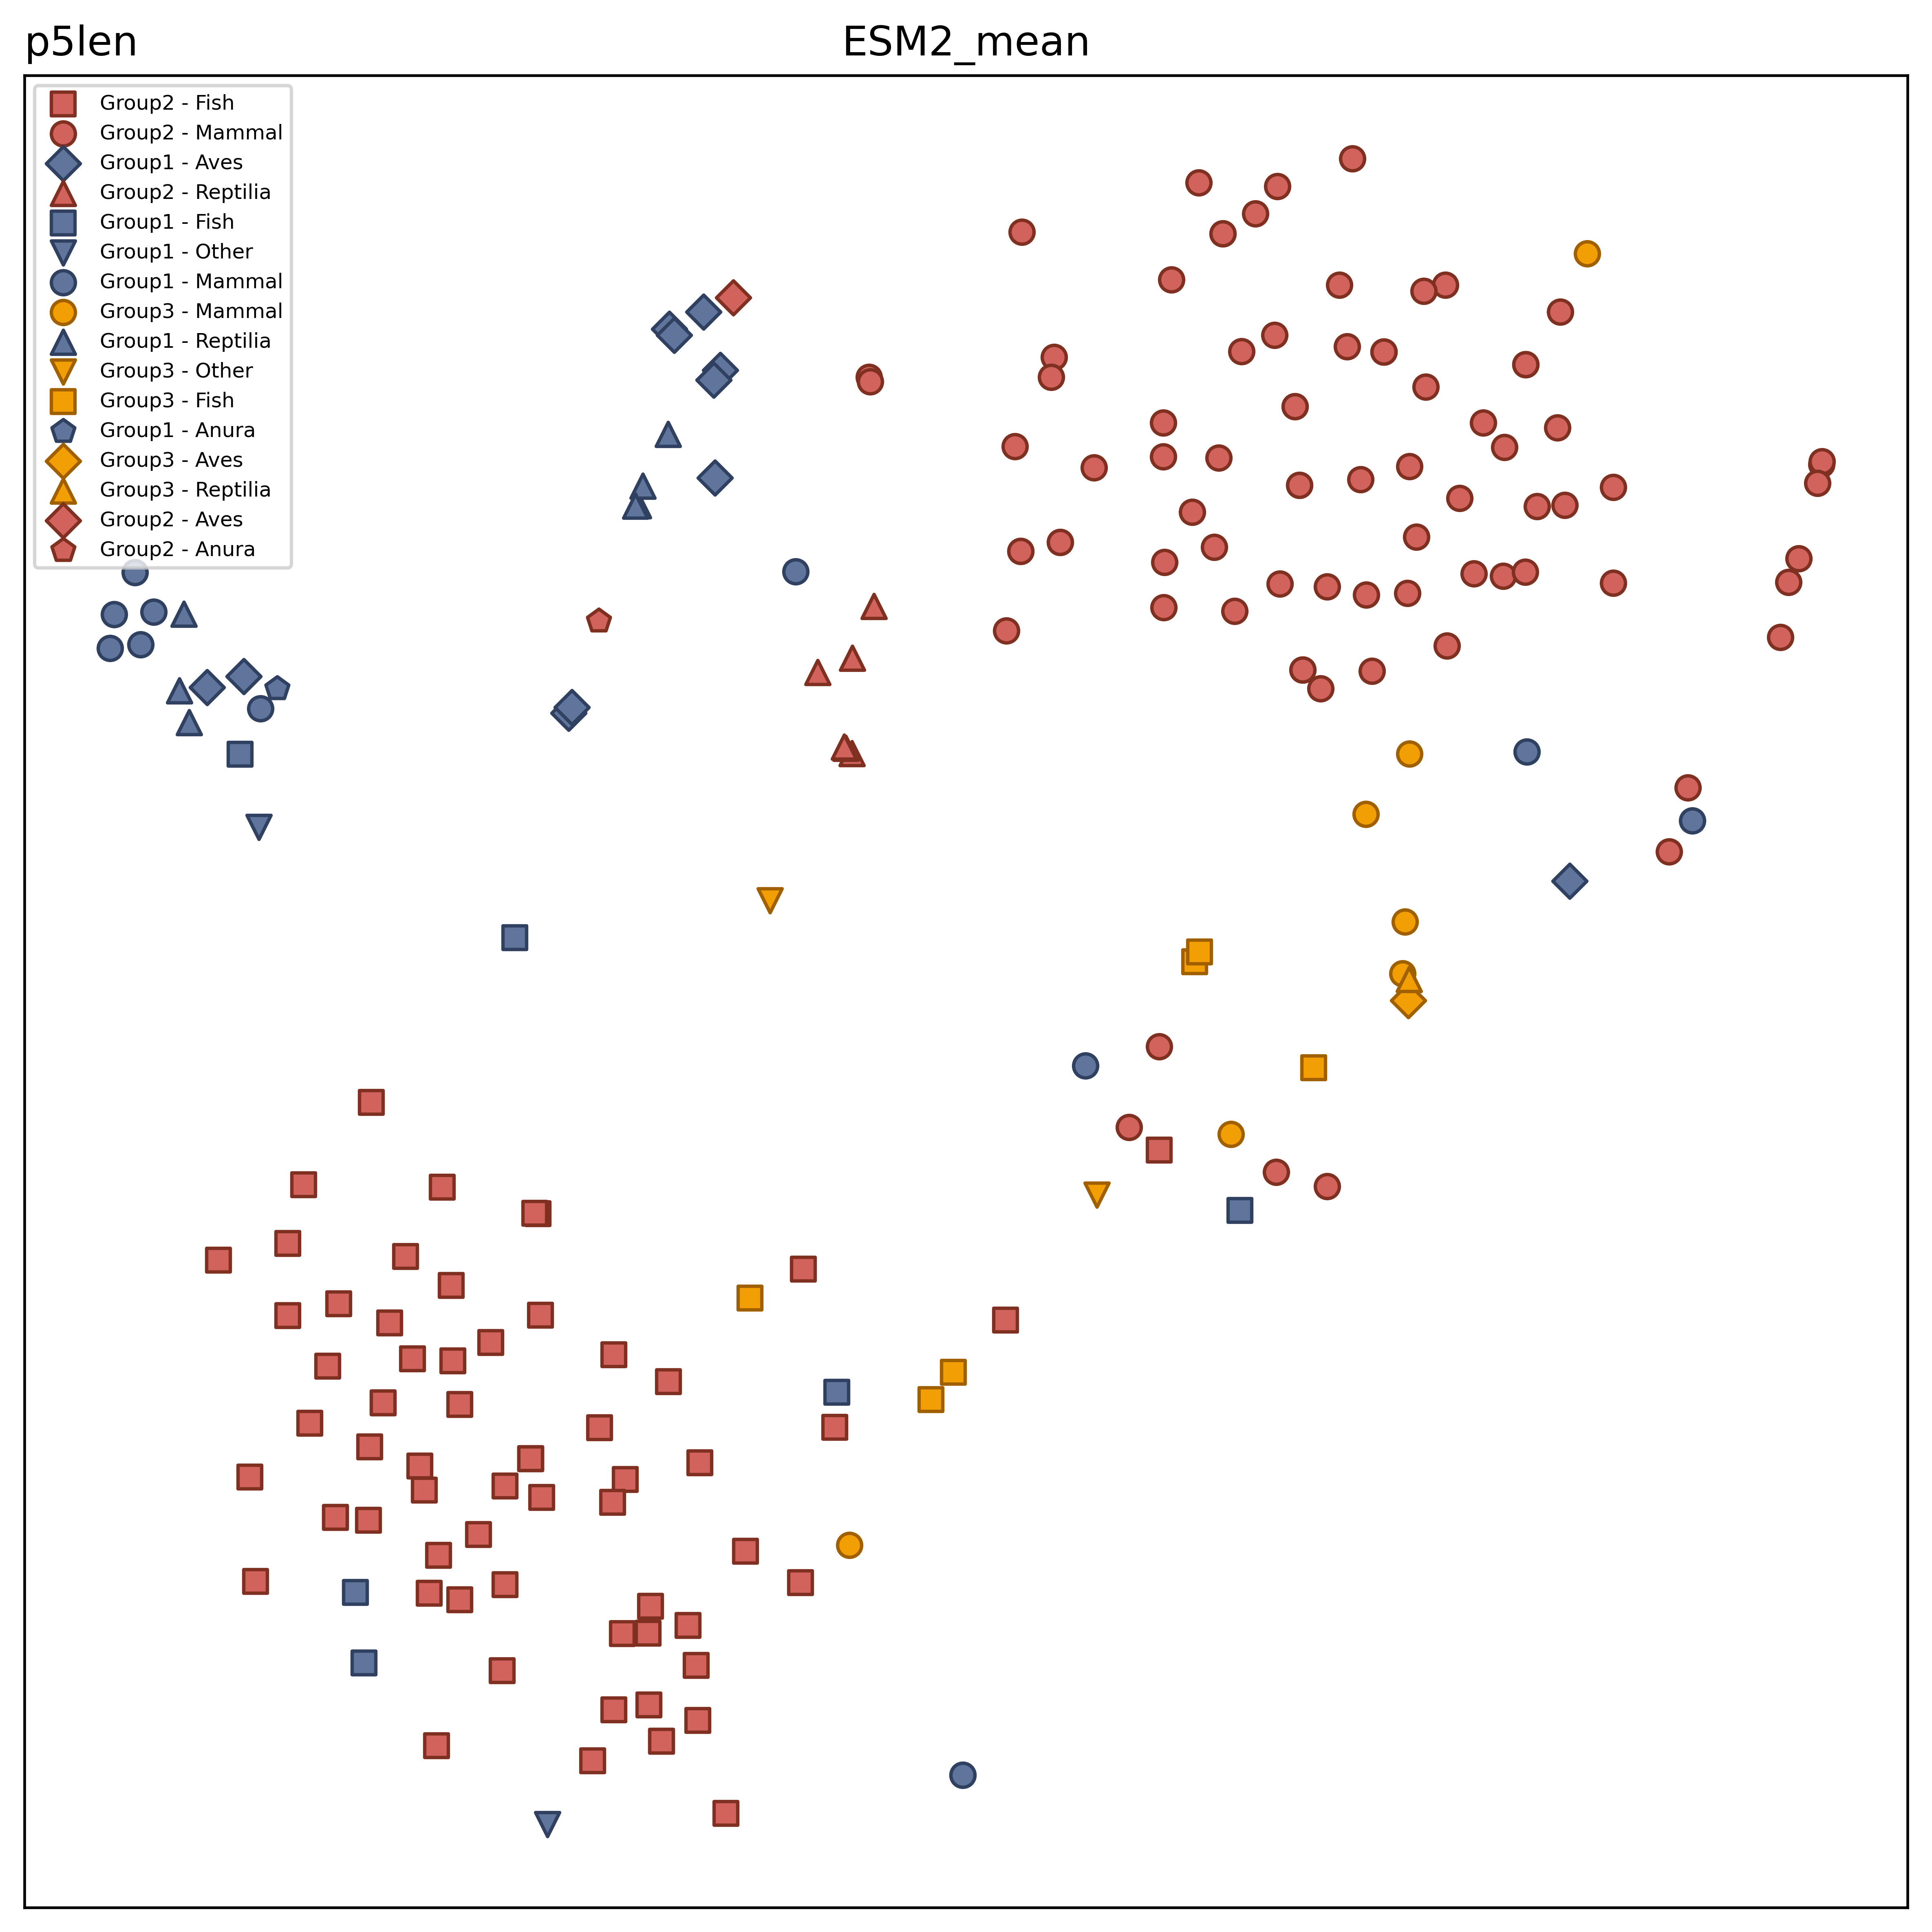

In [24]:
custom_label_to_color = {
    "Group1": "#60759b",  
    "Group2": "#d1625c",
    "Group3": "#f29f05"
}

group_class_to_marker = {
    "Mammal": "o",       
    "Fish": "s",        
    "Reptilia": "^",    
    "Other": "v",        
    "Aves": "D",         
    "Anura": "p"         
}

missing_colors = [label for label in set(label_idx_list) if label not in custom_label_to_color]
missing_markers = [label for label in set(group_class_sub_list) if label not in group_class_to_marker]
if missing_colors:
    print(f"Warning: Missing colors for labels: {missing_colors}")
if missing_markers:
    print(f"Warning: Missing markers for group classes: {missing_markers}")

edge_color_dict = {
    "Group1": "#304060",  
    "Group2": "#803020", 
    "Group3": "#a06000"  
}

figure = plt.figure(figsize=(8, 8), dpi=600)
clusters = {}
for idx, (x_coord, y_coord) in enumerate(X_esm_embedded):
    label_idx = label_idx_list[idx]
    group_class_sub = group_class_sub_list[idx]
    color = custom_label_to_color.get(label_idx, "#000000")  
    marker = group_class_to_marker.get(group_class_sub, "o") 
    key = (label_idx, group_class_sub)
    
    if key not in clusters:
        clusters[key] = [[x_coord], [y_coord], color, marker]
    else:
        clusters[key][0].append(x_coord)
        clusters[key][1].append(y_coord)

for (label_idx, group_class_sub), data in clusters.items():
    x_coords, y_coords = data[0], data[1]
    color, marker = data[2], data[3]
    label = f"{label_idx} - {group_class_sub}"
    edge_color = edge_color_dict.get(label_idx, "#000000") 
    plt.scatter(x_coords, y_coords, color=color, marker=marker, label=label, edgecolors=edge_color, s=50)

plt.legend(loc="best", fontsize=6, frameon=True)
plt.xticks([])
plt.yticks([])
plt.title("p5len", loc='left')
plt.title("ESM2_mean", loc='center')
plt.tight_layout()

#plt.savefig("./plot/esm_mean_p5len_group.png", dpi=600, format='png')
#plt.savefig("./plot/esm_mean_p5len_group.pdf", dpi=600, format='pdf')
plt.show()